In [1]:
import sys
sys.path.append('/Users/michal/PythonProjects/MOTIVE')
from simulation_parameters import *
from imports_file import *
from matplotlib.colors import LogNorm

Host name:  Michals-MacBook-Pro.local
Target Date and Time: 2016-03-03 00:00:00
Elapsed Seconds: 510278400.0
Elapsed hours: 141744.0
Elapsed Seconds: 515199600
Target Date and Time: 2016-04-28 23:00:00


# PSD 1D

### upload dataset

In [17]:
dst_path = os.path.join(data_path_psd, "psd1_test_1.nc")
dat_dst = Dataset(dst_path, 'r')
freq = dat_dst.variables['freq'][:]/4
psd = dat_dst.variables['psd'][:]
depths = dat_dst.variables['depths'][:]
dat_dst.close()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michal/Data/MOTIVE/psd/psd1_test_1.nc'

### plot psd

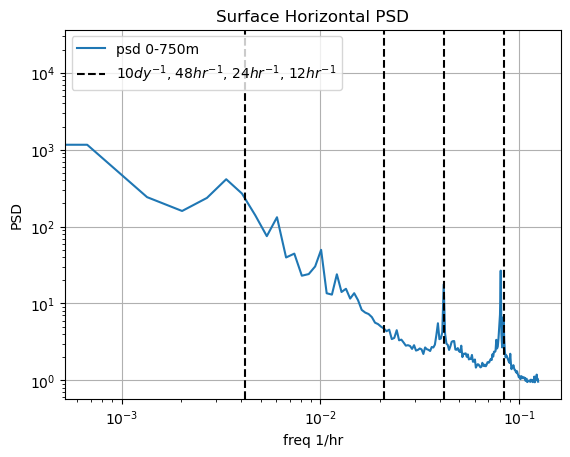

In [110]:
# plt.plot(freq, psd.mean(axis=0))
plt.plot(freq, psd.mean(axis=0))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq 1/hr')
plt.ylabel('PSD')
plt.title('Surface Horizontal PSD')
plt.grid(True)
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['psd 0-750m', '10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'])
plt.show()

(49, 219) (88,) (49,)


TypeError: Dimensions of C (49, 219) are incompatible with X (49) and/or Y (88); see help(pcolormesh)

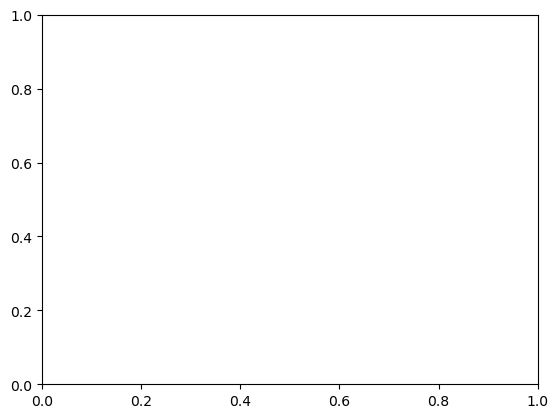

In [15]:
plt.close()
print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=psd.min(), vmax=1e3)
plt.pcolormesh(freq,depths,psd, shading='nearest', norm=norm, cmap='jet')
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'],loc=4)
plt.xscale('log')
plt.xlim(freq[1],freq[-1])
plt.colorbar()
plt.show()

## PSD 2D

In [81]:
dst_path = os.path.join(data_path_psd, "psd2d_xi_223_1333_eta_137_137.nc")
dat_dst = Dataset(dst_path, 'r')
kh = dat_dst.variables['kh'][:]*1000
psd = dat_dst.variables['psd'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
dat_dst.close()

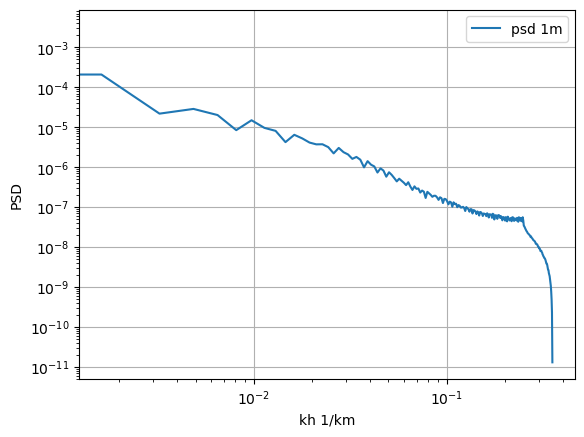

In [82]:
plt.plot(kh, psd.mean(axis=0))
# plt.plot(freq, psd[1,:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('kh 1/km')
plt.ylabel('PSD')
plt.grid(True)
plt.legend(['psd 1m', 'psd 40m', 'psd 200m'])
plt.show()

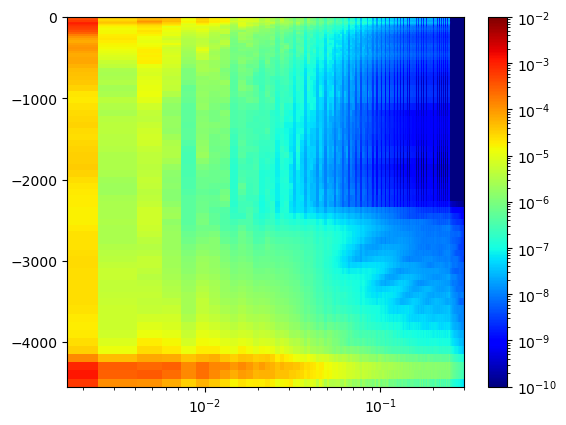

In [85]:
plt.close()
# print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=1e-10, vmax=1e-2)
plt.pcolormesh(kh,depths,psd, shading='nearest', norm=norm, cmap='jet')

plt.xscale('log')
plt.xlim(kh[1],3e-1)
# plt.ylim(-60,0)
plt.colorbar()
plt.show()

## PSD 3D

In [32]:
dst_path = os.path.join(data_path_psd, "psd3d_xi_223_1333_eta_137_359.nc")
dat_dst = Dataset(dst_path, 'r')
kh = dat_dst.variables['kh'][:]*1000
freq = dat_dst.variables['freq'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
psd = dat_dst.variables['psd'][np.logical_and(depths<=-100,depths>=-700),:,:]
psd=np.mean(psd,axis=0)
dat_dst.close()

In [33]:
psd.shape

(337, 219)

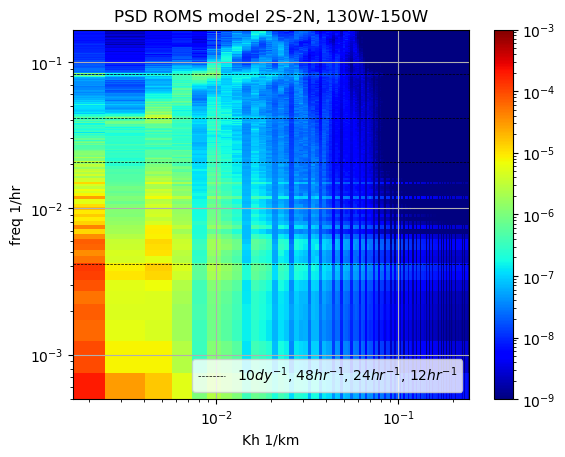

In [34]:
plt.close()
# print(psd.shape, depths.shape, freq.shape)
# norm = LogNorm(vmin=psd.min(), vmax=psd.max())
norm = LogNorm(vmin=1e-9, vmax=1e-3)
plt.pcolormesh(kh,freq,psd, shading='nearest', norm=norm, cmap='jet')

plt.xscale('log')
plt.yscale('log')
plt.xlim(kh[1],kh[-68])
plt.ylim(freq[1],freq[-1])
plt.colorbar()
plt.xlabel('Kh 1/km')
plt.ylabel('freq 1/hr')
plt.title('PSD ROMS model 2S-2N, 130W-150W')
plt.grid(True)
plt.axhline(1/12,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.axhline(1/24,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.axhline(1/48,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.axhline(1/24/10,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.legend(['10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'], loc=4)

plt.show()

In [35]:
freq

masked_array(data=[0.        , 0.00049603, 0.00099206, 0.0014881 ,
                   0.00198413, 0.00248016, 0.00297619, 0.00347222,
                   0.00396825, 0.00446429, 0.00496032, 0.00545635,
                   0.00595238, 0.00644841, 0.00694444, 0.00744048,
                   0.00793651, 0.00843254, 0.00892857, 0.0094246 ,
                   0.00992064, 0.01041667, 0.0109127 , 0.01140873,
                   0.01190476, 0.01240079, 0.01289683, 0.01339286,
                   0.01388889, 0.01438492, 0.01488095, 0.01537698,
                   0.01587302, 0.01636905, 0.01686508, 0.01736111,
                   0.01785714, 0.01835318, 0.01884921, 0.01934524,
                   0.01984127, 0.0203373 , 0.02083333, 0.02132937,
                   0.0218254 , 0.02232143, 0.02281746, 0.02331349,
                   0.02380952, 0.02430556, 0.02480159, 0.02529762,
                   0.02579365, 0.02628968, 0.02678571, 0.02728175,
                   0.02777778, 0.02827381, 0.02876984, 0.02926